In [4]:
#ibraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load DB
transactions_df = pd.read_csv("TASK1/Transactions.csv")
customers_df = pd.read_csv("TASK1/Customers.csv")
products_df = pd.read_csv("TASK1/Products.csv")

# Merge datasets for UA
merged_df = transactions_df.merge(customers_df, on="CustomerID", how="left")
merged_df = merged_df.merge(products_df, on="ProductID", how="left")

#Display Info of dataset
print("Merged Dataset Information:")
print(merged_df.info())

print("\nMerged Dataset Head:")
print(merged_df.head())

# Basic statistics
print("\nBasic Statistics:")
print(merged_df.describe())

Merged Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None

Merged Dataset Head:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T0000


Total Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


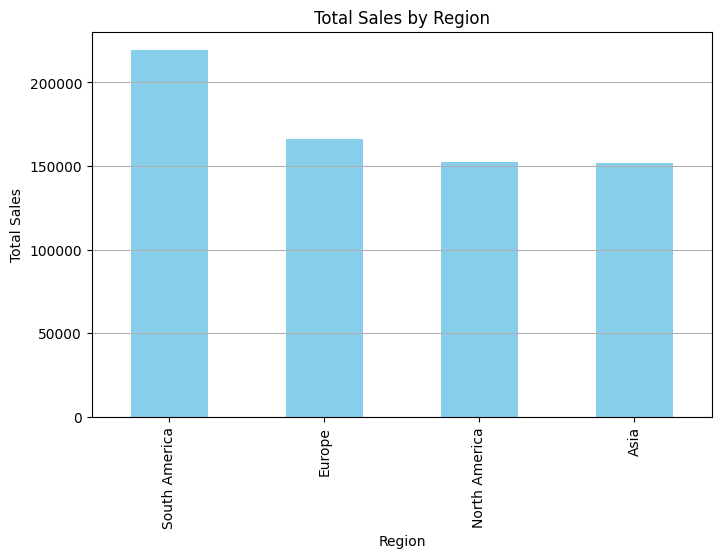

In [5]:
# EDA: Total sales by region
region_sales = merged_df.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Region:")
print(region_sales)

# Plot total sales by region
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()


Top-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64


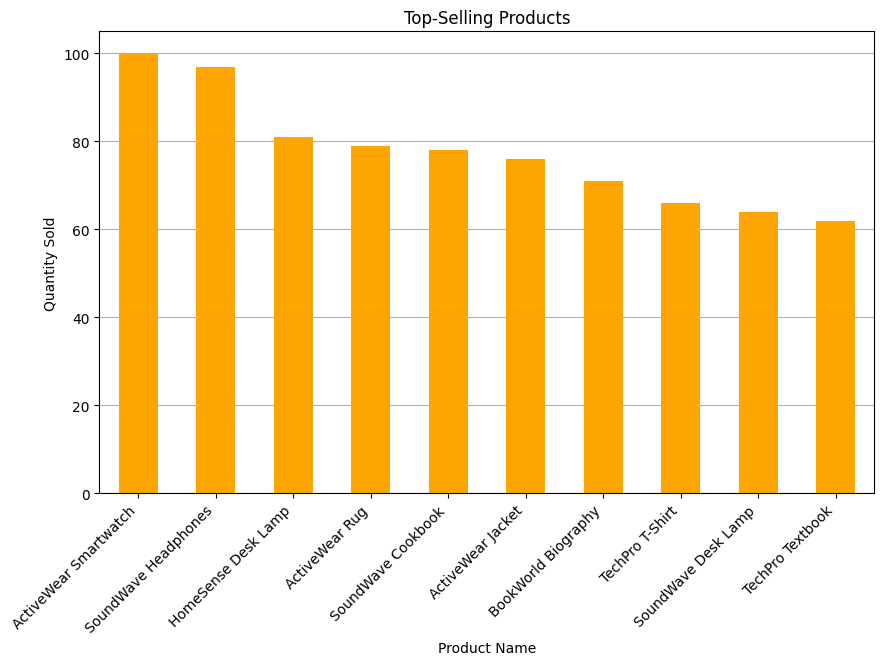

In [6]:
# EDA: Top-selling products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop-Selling Products:")
print(top_products)

# Plot top-selling products
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='orange')
plt.title('Top-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()

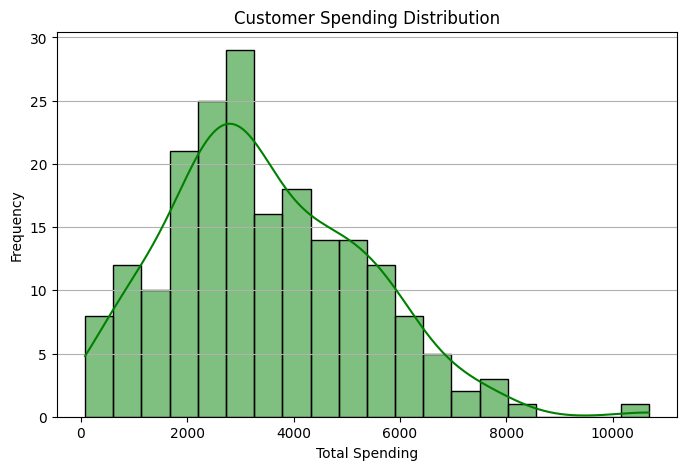

In [7]:
# EDA: Customer spending distribution
plt.figure(figsize=(8, 5))
sns.histplot(merged_df.groupby('CustomerID')['TotalValue'].sum(), bins=20, kde=True, color='green')
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


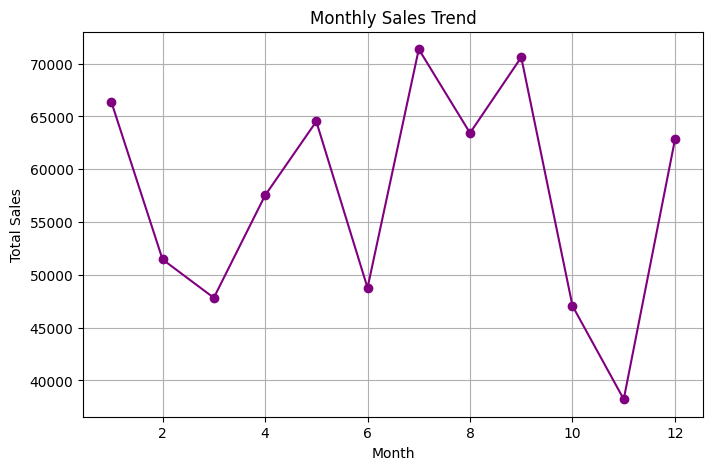

In [8]:
# EDA: Sales trend by month
merged_df['TransactionMonth'] = pd.to_datetime(merged_df['TransactionDate']).dt.month
monthly_sales = merged_df.groupby('TransactionMonth')['TotalValue'].sum()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid()
plt.show()


Total Sales by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


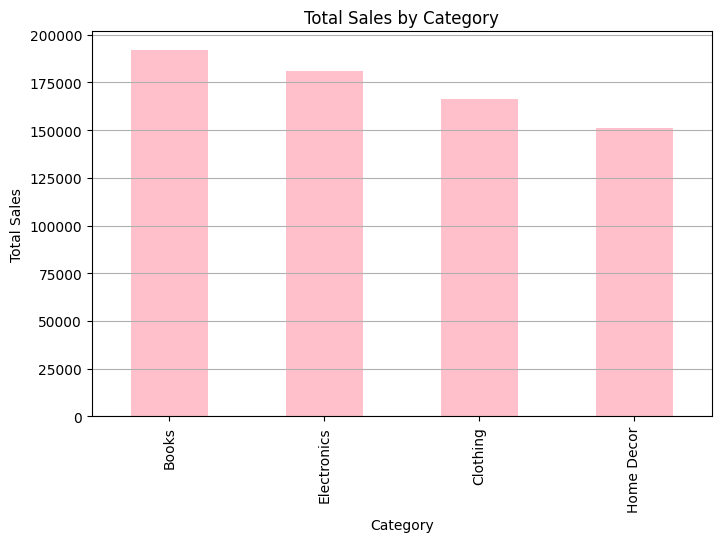

In [9]:
# EDA: Total sales by category
category_sales = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nTotal Sales by Category:")
print(category_sales)

# Plot sales by category
plt.figure(figsize=(8, 5))
category_sales.plot(kind='bar', color='pink')
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()
